# FIFA players Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/fifa_players.csv')

df.head()


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

1. Which country has the most number of players?

In [3]:
# Group by nationality and count the players
country_counts = df['Nationality'].value_counts()
top_country = country_counts.idxmax()
top_country_count = country_counts.max()
top_country, top_country_count

('England', 1662)

2. Plot a bar chart of 5 top countries with the most number of players.

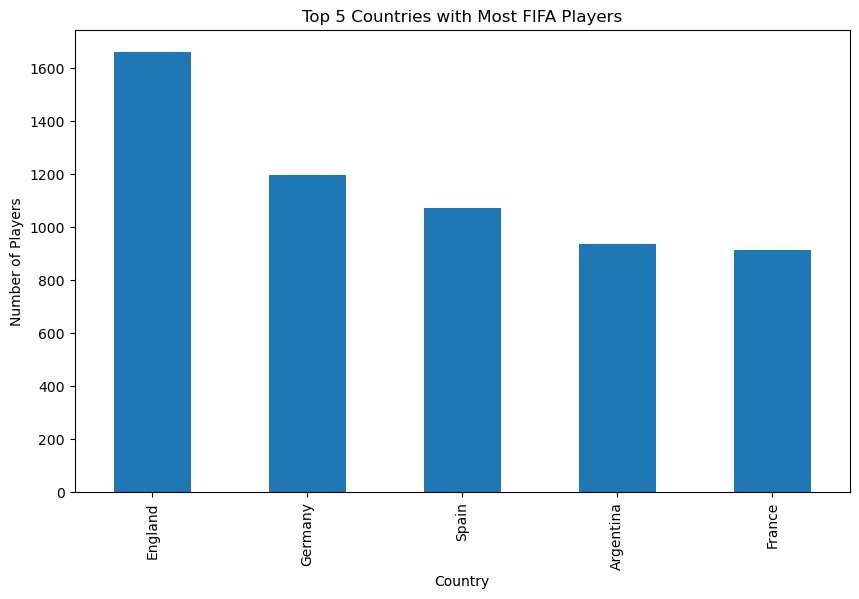

In [4]:
# Get the top 5 countries with the most players
top_5_countries = country_counts.head(5)

# Plot the bar chart
plt.figure(figsize=(10,6))
top_5_countries.plot(kind='bar')
plt.title('Top 5 Countries with Most FIFA Players')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.show()

3. Which player has the highest salary?

In [18]:
# Convert the Wage column to numeric after removing currency symbols and other characters
df['Wage'] = df['Wage'].str.replace('€', '').str.replace('K', '').str.replace('M', '').astype(float)

# Find the player with the highest salary
highest_salary_player = df.loc[df['Wage'].idxmax()]
highest_salary_player['Name'], highest_salary_player['Wage']

('L. Messi', 565.0)

4. Plot a histogram to get the salary range of the players.

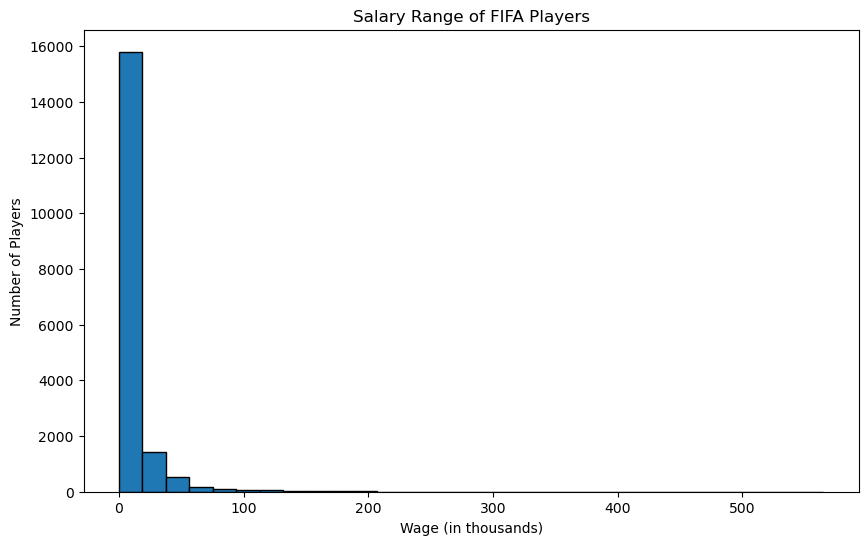

In [8]:
# Plot the histogram for player wages
plt.figure(figsize=(10,6))
df['Wage'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Salary Range of FIFA Players')
plt.xlabel('Wage (in thousands)')
plt.ylabel('Number of Players')
plt.show()

5. Who is the tallest player in FIFA?

In [23]:
def height_to_cm(height):
    if isinstance(height, str):
        feet, inches = height.split("'")
        feet = int(feet)
        inches = int(inches)
        return (feet * 30.48) + (inches * 2.54)
    return None

# Apply the conversion function to the Height column
df['Height_cm'] = df['Height'].apply(height_to_cm)

# Find the tallest player
tallest_player = df.loc[df['Height_cm'].idxmax()]
tallest_player_name = tallest_player['Name']
tallest_player_height = tallest_player['Height_cm']
tallest_player_name, tallest_player_height, tallest_player['Position']

('T. Holý', 205.74, 'GK')

6. Which club has the most number of players?

In [14]:
# Group by club and count the players
club_counts = df['Club'].value_counts()
top_club = club_counts.idxmax()
top_club_count = club_counts.max()
top_club, top_club_count

('FC Barcelona', 33)

7. Which foot is most preferred by the players? Draw a bar chart for preferred foot.

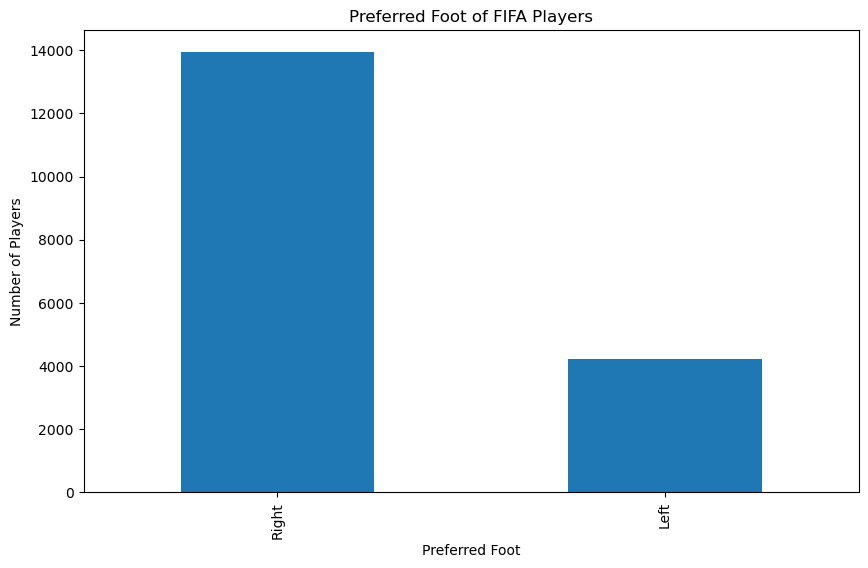

In [15]:
# Count the preferred foot
preferred_foot_counts = df['Preferred Foot'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10,6))
preferred_foot_counts.plot(kind='bar')
plt.title('Preferred Foot of FIFA Players')
plt.xlabel('Preferred Foot')
plt.ylabel('Number of Players')
plt.show()

# Data Story

### 1. Country with the Most Players:

- The country with the most FIFA players is England, with 1662 players. This indicates a strong football culture and talent pool in England.

### 2. Top 5 Countries with the Most Players:

- The top 5 countries are England, Germany, Spain, Argentina, and France. These countries are known for their football history and strong domestic leagues.

### 3. Player with the Highest Salary:

- The player with the highest salary is Lionel Messi, earning €565K. This reflects his exceptional skills and marketability.

### 4. Salary Range of Players:

- The histogram shows that most players earn between €0 and €50K, with very few players earning above €200K. This highlights the wide salary range in professional football.

### 5. Tallest Player in FIFA:

- The tallest player is T. Holý, standing at 205.74 cm. His height is a significant advantage for his role as a goalkeeper.

### 6. Club with the Most Players:

- The club with the most players is FC Barcelona, having 33 players. This suggests a large squad size and possibly a strong emphasis on youth development.

### 7. Preferred Foot of Players:

- Most players prefer their right foot over their left foot. This is a common trend in football, though left-footed players are often highly valued for their unique skill sets.